In [6]:
import shap
import joblib
import pandas as pd
import numpy as np
from numpy import loadtxt
import seaborn as sns; sns.set()

from sklearn.metrics import plot_roc_curve, classification_report
from churn_library import *

In [7]:
df = import_data(r"./data/bank_data.csv")
df.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

### Split categorical and quantotative columns
#### There are 5 categorical features and 14 quantitative features

In [ ]:
cat_columns = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'                
]

quant_columns = [
    'Customer_Age',
    'Dependent_count', 
    'Months_on_book',
    'Total_Relationship_Count', 
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 
    'Credit_Limit', 
    'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 
    'Total_Amt_Chng_Q4_Q1', 
    'Total_Trans_Amt',
    'Total_Trans_Ct', 
    'Total_Ct_Chng_Q4_Q1', 
    'Avg_Utilization_Ratio'
]

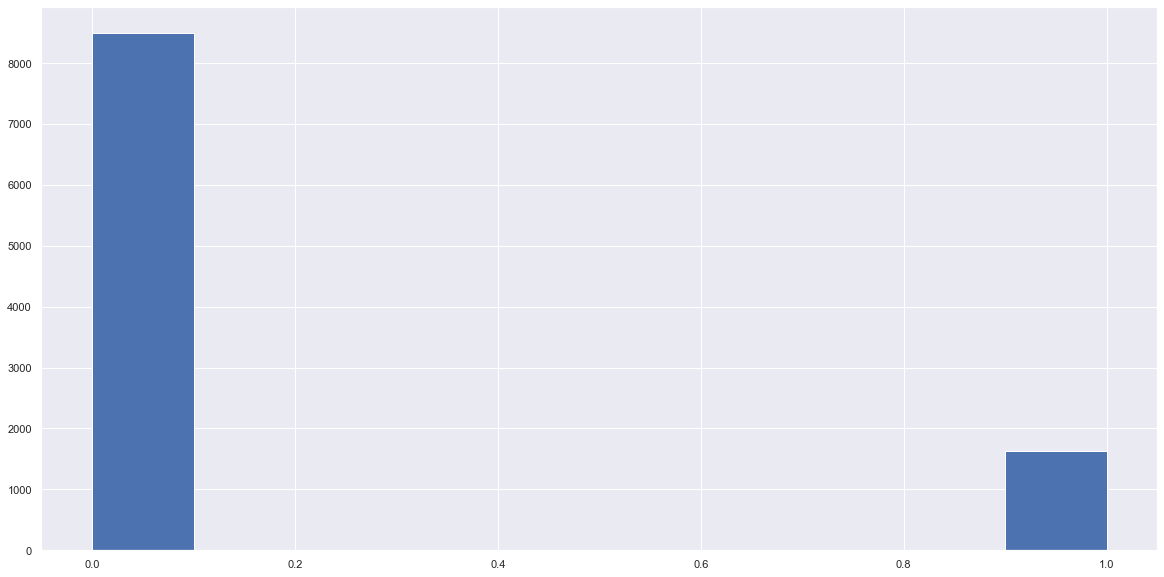

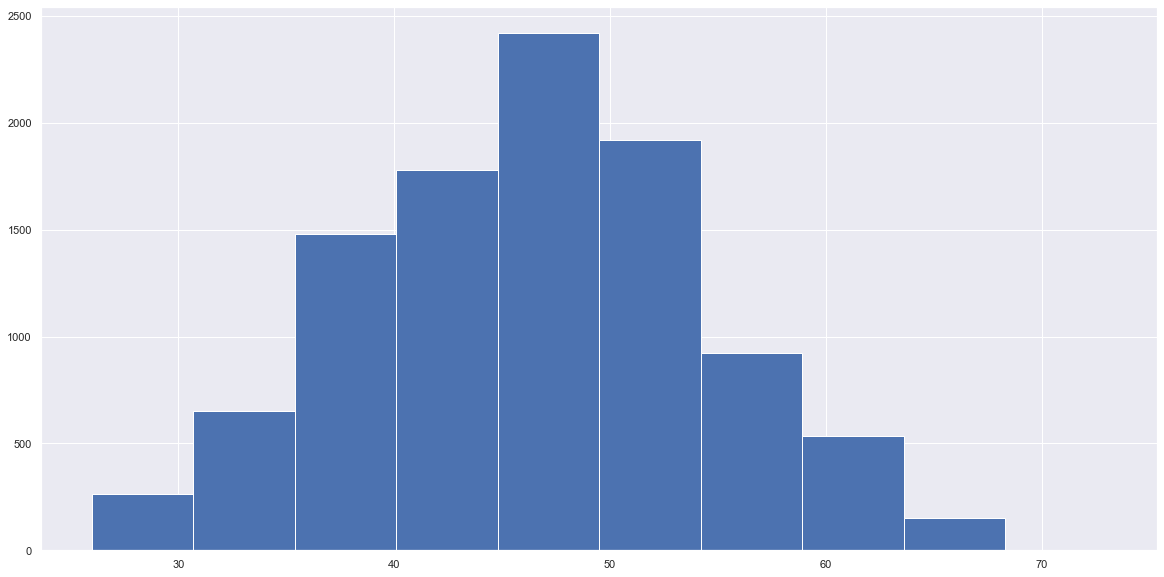

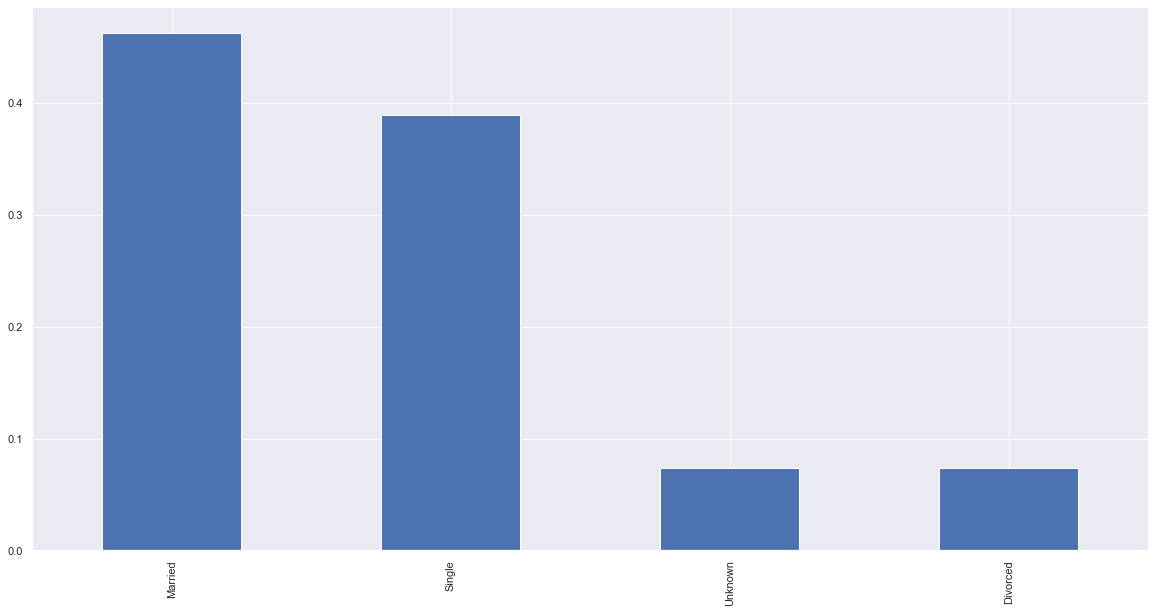

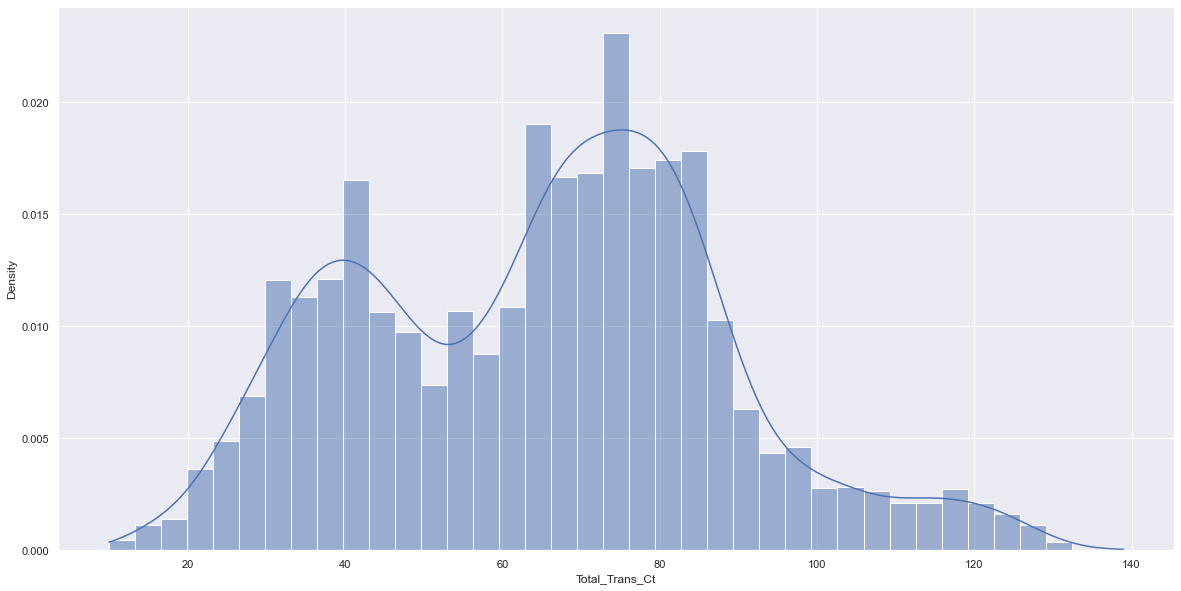

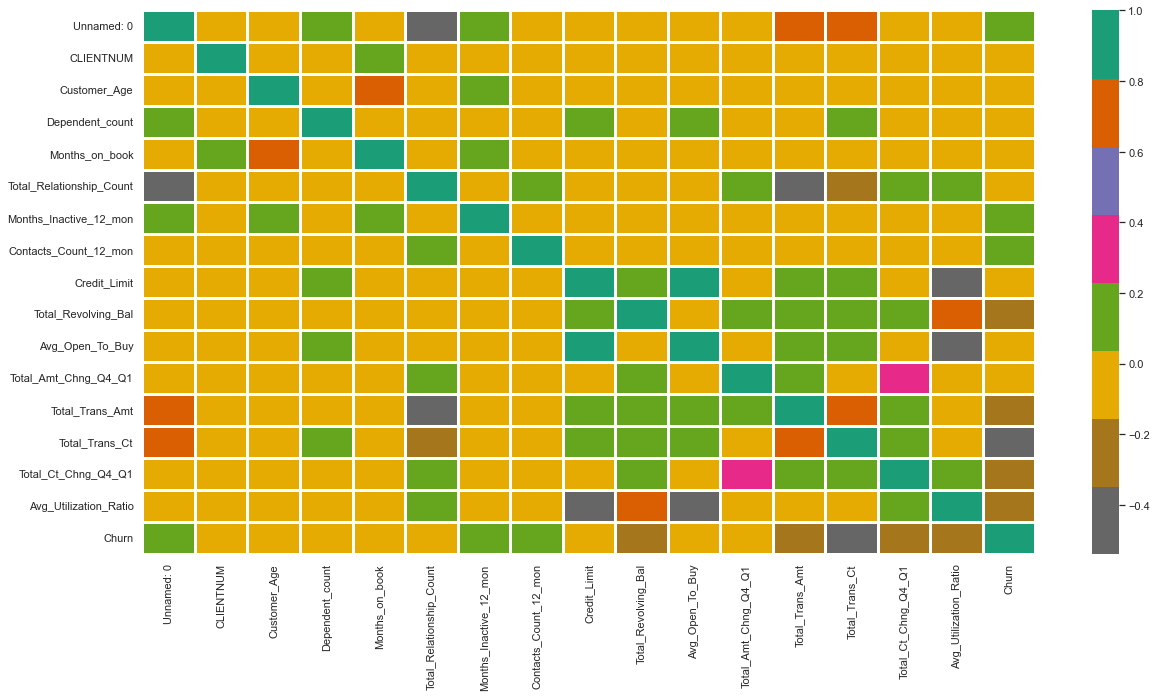

In [8]:
perform_eda(df)

In [9]:
new_df = encoder_helper(df)


In [ ]:
# X = pd.DataFrame()

# keep_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book',
#              'Total_Relationship_Count', 'Months_Inactive_12_mon',
#              'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
#              'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
#              'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
#              'Gender_Churn', 'Education_Level_Churn', 'Marital_Status_Churn', 
#              'Income_Category_Churn', 'Card_Category_Churn']

# X[keep_cols] = new_df[keep_cols]

In [10]:
X_train, X_test, y_train, y_test = perform_feature_engineering(new_df)

   Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1   

In [ ]:
train_models(X_train, X_test, y_train, y_test)


In [ ]:
#USE TO SPEED UP THE CLASSIFICATION REPORT PART TRAINING TOOK 5min to run

y_train_preds_lr = loadtxt('./logs/y_train_preds_lr.csv', delimiter=',')
y_train_preds_rf = loadtxt('./logs/y_train_preds_rf.csv', delimiter=',')
y_test_preds_lr = loadtxt('./logs/y_test_preds_lr.csv', delimiter=',')
y_test_preds_rf = loadtxt('./logs/y_test_preds_rf.csv', delimiter=',')

classification_report_image(y_train,
                                y_test,
                                y_train_preds_lr,
                                y_train_preds_rf,
                                y_test_preds_lr,
                                y_test_preds_rf)


In [ ]:
rfc_model = joblib.load('./models/rfc_model.pkl')
lr_model = joblib.load('./models/logistic_model.pkl')